<a href="https://colab.research.google.com/github/domenechSergi/LaLiga/blob/main/analysis/LaLigaDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [21]:
!cd /content
!wget "https://github.com/doctorfields/la-quiniela/raw/main/laliga.sqlite"

--2023-01-17 20:31:48--  https://github.com/doctorfields/la-quiniela/raw/main/laliga.sqlite
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/doctorfields/la-quiniela/main/laliga.sqlite [following]
--2023-01-17 20:31:49--  https://raw.githubusercontent.com/doctorfields/la-quiniela/main/laliga.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3706880 (3.5M) [application/octet-stream]
Saving to: ‘laliga.sqlite.1’

laliga.sqlite.1     100%[===================>]   3.54M  --.-KB/s    in 0.07s   

2023-01-17 20:31:49 (51.3 MB/s) - ‘laliga.sqlite.1’ saved [3706880/3706880]



In [ ]:
con = sqlite3.connect("laliga.sqlite")
df = pd.read_sql_query("SELECT * from Matches", con)

print(df.head(10))

      season  division  matchday     date  time        home_team  \
0  1928-1929         1         1  2/10/29  None      Arenas Club   
1  1928-1929         1         1  2/10/29  None         Espanyol   
2  1928-1929         1         1  2/10/29  None      Real Madrid   
3  1928-1929         1         1  2/10/29  None         Donostia   
4  1928-1929         1         1  2/12/29  None           Racing   
5  1928-1929         1         2  2/17/29  None        Barcelona   
6  1928-1929         1         2  2/17/29  None         Athletic   
7  1928-1929         1         2  2/17/29  None  Athletic Madrid   
8  1928-1929         1         2  2/17/29  None       Real Unión   
9  1928-1929         1         2  2/17/29  None        Catalunya   

         away_team score  
0  Athletic Madrid   2:3  
1       Real Unión   3:2  
2        Catalunya   5:0  
3         Athletic   1:1  
4        Barcelona   0:2  
5      Real Madrid   1:2  
6         Espanyol   9:0  
7         Donostia   0:3  
8       

# QUESTION 1: Is it true that the home team is more likely to win?

Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or
there’s a tie) of all matches in the data. Write in the plot the percentage of
each category.

In [ ]:
# We will first create two new columns to store the goals of both home and visitor team as integers
home_goals = []
away_goals = []
for i in range(len(df['score'])):
  if df['score'][i] is not None:
    home_goals.append(int(df['score'][i].split(':')[0]))
    away_goals.append(int(df['score'][i].split(':')[1]))
  else:
    home_goals.append(None)
    away_goals.append(None)

df['Home Goals'] = home_goals
df['Away Goals'] = away_goals
#print(df.tail())

In [ ]:
# We can now easily compare both columns and create a third one explicitly showing the winner
winner = []
for i in range(len(df)):
  if df['Home Goals'][i] > df['Away Goals'][i]:
    winner.append("Home")
  elif df['Home Goals'][i] < df['Away Goals'][i]:
    winner.append("Away")
  elif df['Home Goals'][i] == df['Away Goals'][i]:
    winner.append("Tie")
  else:
    winner.append("No Info")

df['Winner'] = winner
print(df.head())

      season  division  matchday     date  time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  None  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  None     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  None  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  None     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  None       Racing        Barcelona   

  score  Home Goals  Away Goals Winner  
0   2:3         2.0         3.0   Away  
1   3:2         3.0         2.0   Home  
2   5:0         5.0         0.0   Home  
3   1:1         1.0         1.0    Tie  
4   0:2         0.0         2.0   Away  


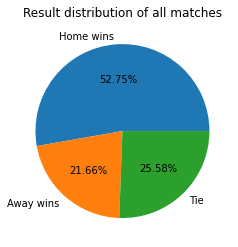

In [ ]:
# We can plot a pie chart using the vectors previously created
chartv = np.array([winner.count("Home"), winner.count("Away"), winner.count("Tie")])
labels = ["Home wins", "Away wins", "Tie"]
plt.pie(chartv, labels=labels, autopct='%1.2f%%')
plt.title("Result distribution of all matches")
plt.show()

# QUESTION 2: What are the top ten scoring teams of all time? What are the ten teams that concede the most?

Make two bar plot charts showing each of them.
Consider only matches played in 1st division.

#What have been the biggest wins? 

Of course, when we say biggest we mean
those with the highest goal difference. Show the top ten of them in a table.

In [ ]:
teams = []
total_goals_scored = []
total_goals_conceded = []
div1_df = df[df["division"] == 1]

for team in np.unique(div1_df['home_team']):
  teams.append(team)
  total_goals_scored.append(np.nansum(div1_df['Home Goals'][div1_df['home_team'] == team]) + np.nansum(div1_df['Away Goals'][div1_df['away_team'] == team]))
  total_goals_conceded.append(np.nansum(div1_df['Home Goals'][div1_df['away_team'] == team]) + np.nansum(div1_df['Away Goals'][div1_df['home_team'] == team]))
  
# Let's create an auxiliary dataframe
TeamStatistics_df = pd.DataFrame({'Team': teams, 'Total Goals Scored': total_goals_scored, 'Total Goals Conceded': total_goals_conceded})
TeamStatistics_df = TeamStatistics_df.sort_values('Total Goals Scored', ascending = False)
TeamStatistics_df

,Team,Total Goals Scored,Total Goals Conceded
10,Barcelona,6267.0,3259.0
48,Real Madrid,6249.0,3287.0
5,Athletic,4802.0,3875.0
65,Valencia,4615.0,3649.0
8,Atlético Madrid,4184.0,2894.0
...,...,...,...
39,Lérida,41.0,134.0
67,Xerez CD,38.0,66.0
15,CD Condal,37.0,57.0
26,CyD Leonesa,34.0,65.0


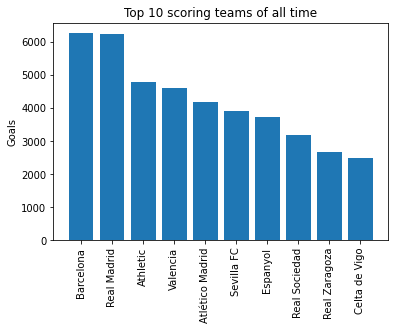

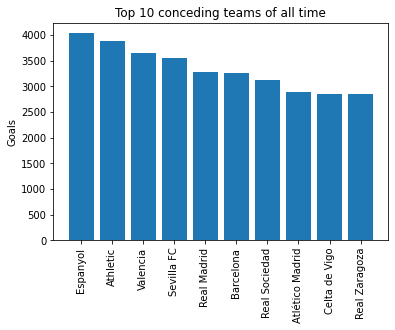

In [ ]:
# We can now easily plot both top-10 scorers and top-10 conceders:

TeamStatistics_df = TeamStatistics_df.sort_values('Total Goals Scored', ascending = False)
plt.bar(TeamStatistics_df['Team'][:10], TeamStatistics_df['Total Goals Scored'][:10])
plt.xticks(rotation=90)
plt.ylabel("Goals")
plt.title("Top 10 scoring teams of all time")
plt.show()

TeamStatistics_df = TeamStatistics_df.sort_values('Total Goals Conceded', ascending = False)
plt.bar(TeamStatistics_df['Team'][:10], TeamStatistics_df['Total Goals Conceded'][:10])
plt.xticks(rotation=90)
plt.ylabel("Goals")
plt.title("Top 10 conceding teams of all time")
plt.show()

In [ ]:
# We can also compute the biggest wins (in 1st division) by taking into account the biggest goal difference per match:
goal_diff_pm = abs(div1_df['Home Goals'] - div1_df['Away Goals'])
div1_df['Goal difference'] = goal_diff_pm

print(div1_df.sort_values('Goal difference', ascending=False).iloc[:10,[0,2,3,5,6,7,11]])

          season  matchday      date        home_team       away_team score  \
225    1930-1931        10    2/8/31         Athletic       Barcelona  12:1   
936    1940-1941         1   9/29/40       Sevilla FC       Barcelona  11:1   
2787   1950-1951        11  11/19/50         Athletic          Lérida  10:0   
1168   1941-1942        15   1/11/42         Athletic   Celta de Vigo  10:0   
1071   1941-1942         1   9/28/41       Sevilla FC     Real Oviedo  10:0   
3629   1953-1954        26   3/28/54        Barcelona     Real Oviedo   9:0   
10024  1978-1979        16   1/14/79        Barcelona  Rayo Vallecano   9:0   
408    1932-1933        10   1/29/33           Racing          Alavés   9:0   
5027   1959-1960        21    2/7/60      Real Madrid        Elche CF  11:2   
3911   1955-1956         1   9/11/55  Atlético Madrid     Hércules CF   9:0   

       Goal difference  
225               11.0  
936               10.0  
2787              10.0  
1168              10.0  
1071 

<ipython-input-9-eaf582697cb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  div1_df['Goal difference'] = goal_diff_pm


# QUESTION 3: There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.

In [ ]:
div1_df_season_1 = div1_df[div1_df["season"] == "2000-2001"]
div1_df_season_2 = div1_df[div1_df["season"] == "2020-2021"]



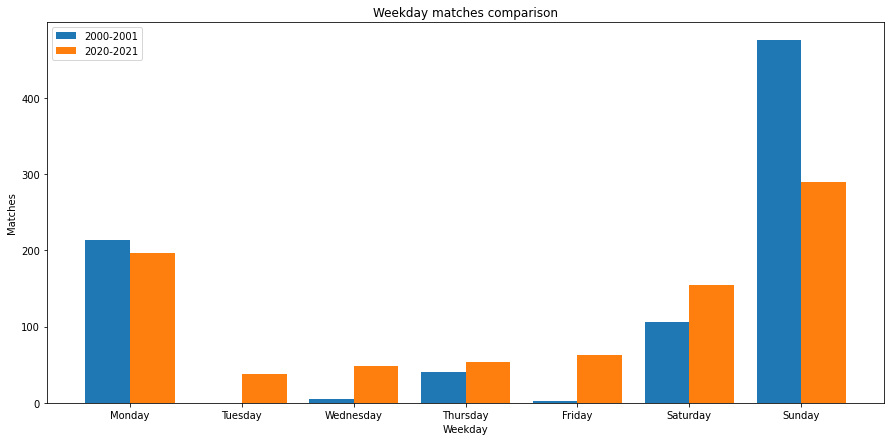

In [ ]:
#We create new format of data entries for every match game
from datetime import date
import calendar

year = []
day = []
month = []
for i in range(len(df)):
  if df['date'][i].split('/')[2] == int(df['season'][i].split('-')[0]) % 100:
    year.append(int(df['season'][i].split('-')[0]))
  else:
    year.append(int(df['season'][i].split('-')[1]))

  day.append(int(df['date'][i].split('/')[1]))
  month.append(int(df['date'][i].split('/')[0]))

df['Year'] = year
df['Month'] = month
df['Day'] = day

weekday = []
for i in range(len(df)):
  weekday.append(calendar.day_name[date(df['Year'][i],df['Month'][i],df['Day'][i]).weekday()])

df['Weekday'] = weekday

#Use the data for seasons 2000-2001 and 2020-2021
df_season_1 = df[df['season'] == '2000-2001']
weekday_season_1 = df_season_1['Weekday'].tolist()

df_season_2 = df[df['season'] == '2020-2021']
weekday_season_2 = df_season_2['Weekday'].tolist()

#Bar plot
Counts_1 = [weekday_season_1 .count("Monday"), weekday_season_1 .count("Tuesday"), weekday_season_1 .count("Wednesday"), weekday_season_1 .count("Thursday"), weekday_season_1 .count("Friday"), weekday_season_1 .count("Saturday"), weekday_season_1 .count("Sunday")]
Counts_2 = [weekday_season_2 .count("Monday"), weekday_season_2 .count("Tuesday"), weekday_season_2 .count("Wednesday"), weekday_season_2 .count("Thursday"), weekday_season_2 .count("Friday"), weekday_season_2 .count("Saturday"), weekday_season_2 .count("Sunday")]
Label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
X_axis = np.arange(len(Label))
plt.figure(figsize=(15,7))
plt.bar(X_axis - 0.2, Counts_1, 0.4, label = '2000-2001')
plt.bar(X_axis + 0.2, Counts_2, 0.4, label = '2020-2021')

plt.xticks(X_axis, Label)
plt.xlabel("Weekday")
plt.ylabel("Matches")
plt.title("Weekday matches comparison")
plt.legend()
plt.show()


<ipython-input-12-72b81ee9043e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  div1_df_season_1["time"] = pd.Categorical(div1_df_season_1["time"], categories = time_categories1)


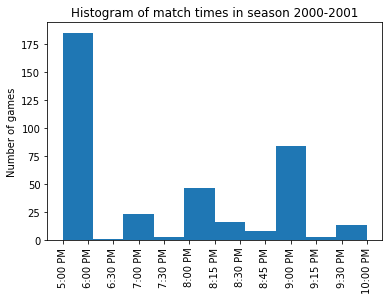

<ipython-input-12-72b81ee9043e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  div1_df_season_2["time"] = pd.Categorical(div1_df_season_2["time"], categories = time_categories2)


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
#Display of the match times' histograms in both seasons 2000-2001 and 2020-2021
time_categories1 = ["5:00 PM", "6:00 PM", "6:30 PM", "7:00 PM", "7:30 PM", "8:00 PM", "8:15 PM", "8:30 PM","8:45 PM", "9:00 PM", "9:15 PM", "9:30 PM", "10:00 PM" ]
div1_df_season_1["time"] = pd.Categorical(div1_df_season_1["time"], categories = time_categories1)
sort_1=div1_df_season_1["time"] 
plt.xticks(rotation=90)
plt.hist(sort_1.sort_values())
plt.ylabel("Number of games")
plt.title("Histogram of match times in season 2000-2001")
plt.show()

time_categories2 = ["1:00 PM","2:00 PM","4:00 PM","4:15 PM","5:00 PM","5:30 PM", "6:00 PM", "6:30 PM", "7:00 PM", "7:15 PM", "7:30 PM", "7:45 PM", "8:00 PM", "9:00 PM", "9:30 PM", "10:00 PM" ]
div1_df_season_2["time"] = pd.Categorical(div1_df_season_2["time"], categories = time_categories2)
sort_2=div1_df_season_2["time"].dropna()
plt.xticks(rotation=90)
plt.hist(sort_2.sort_values())
plt.ylabel("Number of games")
plt.title("Histogram of match times in season 2020-2021")
plt.show()

#QUESTION 4: Build a cross results table for season 2020-2021 (1st division). Could you model the intensity of this background color with the goal difference from the match?

Try to make it the most similar to this one:
use team abbreviations as column names and paint the background of each
cell according to result (green in case local team wins and red in case visitor
team wins). 

Write a function that, given the season and division, plots the cross results table. Function prototype should be like plot_cross_results_ta-
ble(season, division) and return the plot object.


In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

def plot_cross_results_table(season: str, division: int):
  div1_df = df[df["division"] == division]
  goal_diff_pm = div1_df['Home Goals'] - div1_df['Away Goals']
  div1_df['Goal difference'] = goal_diff_pm
  div1_df_season = div1_df[div1_df["season"] == season]

  ann = np.array([])
  for i,home in enumerate(np.unique(div1_df_season['home_team'])):
    for i,away in enumerate(np.unique(div1_df_season['home_team'])):
      ann = np.append(ann,div1_df_season[(div1_df_season['home_team'] == home) & (div1_df_season['away_team'] == away)]['score'].values)

  index = [(len(np.unique(div1_df_season['home_team']))-1)*i+i for i in range(len(np.unique(div1_df_season['home_team'])))]
  ann = np.insert(ann, index, '-')

  return sns.heatmap(pd.crosstab(div1_df_season['home_team'], div1_df_season['away_team'], div1_df_season['Goal difference'].values, 
                                 aggfunc='mean'), annot=ann.reshape(len(np.unique(div1_df_season['home_team'])),len(np.unique(div1_df_season['home_team']))),
                                 cmap="RdYlGn", cbar=False, fmt = '')

plot_cross_results_table("2020-2021", 1)
plt.show()

plot_cross_results_table("2012-2013", 2)
plt.show()

#QUESTION 5: As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? 

Show both things in two pie charts, side by side. Remember to consider ties in the first one.
Write a function that, given two team names, plots the two graphs described
above. Function prototype should be like plot_direct_confrontations_-
stats(team1, team2) and return the plot object. Use it with some other
classical rivals like Betis and Sevilla.

In [ ]:
#Falta pprogramar-ho com a funcio 
def plot_direct_confrontations_stats(team1, team2):
  clasicos=div1_df[div1_df['away_team']==team1]
  clasicos=clasicos[clasicos['home_team']==team2]
  team1_w=0
  team2_w=0

  tie= 0
  for i in range(len(clasicos)):
    if clasicos['Winner'].iloc[i]=='Away':
      team1_w+=1
    elif clasicos['Winner'].iloc[i]=='Home':
      team2_w+=1
    else:
      tie+=1

  clasicos1=div1_df[div1_df['home_team']==team1]
  clasicos1=clasicos1[clasicos1['away_team']==team2]
  for i in range(len(clasicos1)):
    if clasicos1['Winner'].iloc[i]=='Away':
      team2_w+=1
    if clasicos1['Winner'].iloc[i]=='Home':
      team1_w+=1
    else:
      tie+=1

  chart_clasico = np.array([team2_w, team1_w, tie])
  labels = [team2, team1, "Tie"]
  plt.pie(chart_clasico, labels=labels, autopct='%1.2f%%')
  plt.title("Result distribution of all games")
  plt.show()

  team1_g=0
  team2_g=0
  for i in range(len(clasicos)):
    if clasicos['Home Goals'].iloc[i] > 0:
      team1_g+=clasicos['Home Goals'].iloc[i]
    elif clasicos['Away Goals'].iloc[i] > 0:
      team2_g+=clasicos['Away Goals'].iloc[i]

  for i in range(len(clasicos1)):
    if clasicos1['Away Goals'].iloc[i] > 0:
      team2_g+=clasicos1['Away Goals'].iloc[i]
    if clasicos1['Home Goals'].iloc[i] > 0:
      team1_g+=clasicos1['Home Goals'].iloc[i]

  chart_clasico_goles = np.array([team2_g, team1_g])
  labels = [team2 +" Goals", team1 +" Goals"]
  plt.pie(chart_clasico_goles, labels=labels, autopct='%1.2f%%')
  plt.title("Goal distribution of all games")
  plt.show() 


In [ ]:
plot_direct_confrontations_stats('Real Madrid', 'Barcelona')
plot_direct_confrontations_stats('Sevilla FC', 'Real Betis')


#QUESTION 6: Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games without losing. That was, by far, the longest undefeated streak in their history. Which teams have had the longest undefeated streaks? 

Show the
longest undefeated streaks in a horizontal bar plot, indicating in each bar
the team name and the dates it held that streak, for instance, Real Sociedad
22/04/1979 - 04/05/1980.

In [ ]:
#Create a list with all the teams
df['home_team'].tolist()
Equips = list(dict.fromkeys(df['home_team'].tolist()))

#Calculate the undefeated streaks
Max_streak = []
Wins = []
Dates = []
Final = []

for i in range(len(Equips)):
  Curr_streak = 0
  Streak = 0
  for j in range(len(df)):
    if df['home_team'][j] == Equips[i]:
      if df['Home Goals'][j] >= df['Away Goals'][j]:
        Curr_streak +=1
        Streak = Curr_streak
        Wins.append(Streak)

      elif df['Home Goals'][j] < df['Away Goals'][j]:
        Curr_streak = 0
        Wins.append(Curr_streak)
    
    if df['away_team'][j] == Equips[i]:
      if df['Home Goals'][j] <= df['Away Goals'][j]:
        Curr_streak += 1
        Streak = Curr_streak
        Wins.append(Streak)
      else:
        Curr_streak = 0
        Wins.append(Curr_streak)

  if Wins ==[]:
    Wins = [0]
  Max_streak.append(np.max(Wins))
  df_team = df[(df['away_team']== Equips[i]) | (df['home_team']== Equips[i])].reset_index()
  
  if Wins.index(np.max(Wins))-(np.max(Wins)) < 0:
    Start_streak = df_team['date'][Wins.index(np.max(Wins))-(np.max(Wins)-1)].split('/')[1] + '/' + df_team['date'][Wins.index(np.max(Wins))-(np.max(Wins)-1)].split('/')[0] + '/' + df_team['date'][Wins.index(np.max(Wins))-(np.max(Wins)-1)].split('/')[2]
  else:
    Start_streak = df_team['date'][Wins.index(np.max(Wins))-(np.max(Wins))].split('/')[1] + '/' + df_team['date'][Wins.index(np.max(Wins))-(np.max(Wins))].split('/')[0] + '/' + df_team['date'][Wins.index(np.max(Wins))-(np.max(Wins))].split('/')[2]

  End_streak = df_team['date'][Wins.index(np.max(Wins))].split('/')[1] + '/' + df_team['date'][Wins.index(np.max(Wins))].split('/')[0] + '/' + df_team['date'][Wins.index(np.max(Wins))].split('/')[2]
  Dates.append('(' +Start_streak +' - '+ End_streak +')')
  Final.append(Equips[i] + ' ' + Dates[i])

  Wins = []

# Figure Size
fig, ax = plt.subplots(figsize =(35, 12))   
# Horizontal Bar Plot
plt.bar(Final, Max_streak)
plt.xticks(rotation=90)

 
# Show Plot
plt.show()

#QUESTION 7: Create a table with the final standings of each season (and division), that is, a table that contains all the teams ordered (in descending order) by the number of points they got during that season, and some other aggregate statistics. The table must contain the following columns: season, division, ranking, team, GF (total goals scored), GA (total goals conceded), GD (goals difference), W (total wins), L (total loses), T (total ties), Pts (points). Remember that, in football, you earn 3 points per victory, and 1 point per tie (none for loses). 

In case two teams have same number of points, order by GD (de- scending), and then by GF (also descending). Order the table so that stand- ings of one season come before standings of previous one, and standings of 1st division come before standings of 2nd division.

Save the final table in Excel with the name SeasonStandings.xlsx in the
reports/ folder.


In [22]:
def calculate_ranks(data, season):
    # Filter data for given season
    season_data = data[data["season"] == season]
    season_data1= season_data[season_data["division"] == 1]
    season_data2= season_data[season_data["division"] == 2]
    teams_1 = set(season_data1["home_team"]).union(set(season_data1["away_team"]))
    teams_2 = set(season_data2["home_team"]).union(set(season_data2["away_team"]))
    # Create dictionaries to store points, wins, losses, ties, total_goals, goals_conceded, and goal_difference for each team
    points1 = {team: 0 for team in teams_1}
    wins1 = {team: 0 for team in teams_1}
    losses1 = {team: 0 for team in teams_1}
    ties1 = {team: 0 for team in teams_1}
    total_goals1 = {team: 0 for team in teams_1}
    goals_conceded1 = {team: 0 for team in teams_1}
    goal_difference1 = {team: 0 for team in teams_1}
    for index, row in season_data1.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_goals = row["Home Goals"]
        away_goals = row["Away Goals"]
        total_goals1[home_team] += home_goals
        goals_conceded1[home_team] += away_goals
        goal_difference1[home_team] += home_goals - away_goals
        total_goals1[away_team] += away_goals
        goals_conceded1[away_team] += home_goals
        goal_difference1[away_team] += away_goals - home_goals
        if home_goals > away_goals:
            points1[home_team] += 3
            wins1[home_team] += 1
            losses1[away_team] += 1
        elif home_goals < away_goals:
            points1[away_team] += 3
            wins1[away_team] += 1
            losses1[home_team] += 1
        else:
            points1[home_team] += 1
            points1[away_team] += 1
            ties1[home_team] += 1
            ties1[away_team] += 1
    # Repeat the same process for division 2
    points2 = {team: 0 for team in teams_2}
    wins2 = {team: 0 for team in teams_2}
    losses2 = {team: 0 for team in teams_2}
    ties2 = {team: 0 for team in teams_2}
    total_goals2 = {team: 0 for team in teams_2}
    goals_conceded2 = {team: 0 for team in teams_2}
    goal_difference2 = {team: 0 for team in teams_2}
    for index, row in season_data2.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_goals = row["Home Goals"]
        away_goals = row["Away Goals"]
        total_goals2[home_team] += home_goals
        goals_conceded2[home_team] += away_goals
        goal_difference2[home_team] += home_goals - away_goals
        total_goals2[away_team] += away_goals
        goals_conceded2[away_team] += home_goals
        goal_difference2[away_team] += away_goals - home_goals
        if home_goals > away_goals:
            points2[home_team] += 3
            wins2[home_team] += 1
            losses2[away_team] += 1
        elif home_goals < away_goals:
            points2[away_team] += 3
            wins2[away_team] += 1
            losses2[home_team] += 1
        else:
            points2[home_team] += 1
            points2[away_team] += 1
            ties2[home_team] += 1
            ties2[away_team] += 1
    # Create lists to store the values of each division
    teams_div1 = []
    teams_div2 = []
    # Append the values of each team in division 1 and 2 to the respective list
    for team in teams_1:
      teams_div1.append({"season": season, "division": 1,"team": team,  "points": points1[team], "W": wins1[team], "L": losses1[team], "T": ties1[team], "GF": total_goals1[team], "GA": goals_conceded1[team], "GD": goal_difference1[team]})
    for team in teams_2:
        teams_div2.append({"season": season, "division": 2,"team": team, "points": points2[team], "W": wins2[team], "L": losses2[team], "T": ties2[team], "GF": total_goals2[team], "GA": goals_conceded2[team], "GD": goal_difference2[team]})
    # Concatenate the lists
    teams_div1.extend(teams_div2)
    # Sort the teams by total points, goal difference, and total goals
    sorted_teams = sorted(teams_div1, key=lambda x: (x['division'], -x["points"], -x["GD"], -x["GF"]))
    return sorted_teams

In [28]:
# List of seasons
seasons=list(dict.fromkeys(df['season'].tolist()))
seasons = inverted_list = seasons[::-1]
seasons.pop(0)
df = df.dropna(subset=['score'])


# Create an empty list to store the rankings
rankings = []

# Iterate over the seasons
for season in seasons:
    # Call the calculate_ranks function for each season
    season_rankings = calculate_ranks(df, season)
    # Append the results to the rankings list
    rankings.extend(season_rankings)


rankings_df = pd.DataFrame(rankings)

# Group the teams by division and season
rankings_df_grouped = rankings_df.groupby(["division", "season"])
# Assign the rank for each team
rankings_df["rank"] = rankings_df_grouped["points"].rank(method="first", ascending=False)
# Reset the index of the DataFrame
rankings_df = rankings_df.reset_index(drop=True)
# Re-index the DataFrame with the rank column
rankings_df.index = rankings_df["rank"]
# Save the dataframe to an Excel file

writer = pd.ExcelWriter("reports/SeasonStandings.xlsx")
rankings_df.to_excel(writer, sheet_name="Rankings", index=False)
writer.save()

#QUESTION 8: Villarreal is a team that has grown a lot in recent decades. Specially ever since some billionaire guy bought it (Fernando Roig, from Mercadona).Make a line plot showing the rank of Villarreal at the end of each season,from the oldest ones (left) to the earliest ones (right). Consider rankings in 2nd division to be a continuation of the 1st one, that is, if there’s N teams in 1st division and Villarreal got r position in 2nd division, then it should be placed in N + r. Draw in the same plot a line showing the cut between 1st and 2nd division.

Write a function that, given n team names, plots the graph described above
of each one of them superposed. Function prototype should be like plot_-
ranking_evolution(team1, team2, ..., teamN) and return the plot ob-
ject (note that function should not take one array-type argument, but n ar-
guments). Use it to compare the evolution of all the teams that currently
play in 1st division.

In [ ]:
def calculate_ranks(data, season):
    # Filter data for given season
    season_data = data[data["season"] == season]
    season_data1= season_data[season_data["division"] == 1]
    season_data2= season_data[season_data["division"] == 2]
    teams_1 = set(season_data1["home_team"]).union(set(season_data1["away_team"]))
    teams_2 = set(season_data2["home_team"]).union(set(season_data2["away_team"]))
    # Create a dictionary to store points for each team
    points1 = {team: 0 for team in teams_1}
    for index, row in season_data1.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_goals = row["Home Goals"]
        away_goals = row["Away Goals"]
        if home_goals > away_goals:
            points1[home_team] += 3
        elif home_goals < away_goals:
            points1[away_team] += 3
        else:
            points1[home_team] += 1
            points1[away_team] += 1
    # Sort teams by points in descending order
    sorted_teams1 = sorted(points1, key=points1.get, reverse=True)

        # Create a dictionary to store points for each team
    points2 = {team: 0 for team in teams_2}
    for index, row in season_data2.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_goals = row["Home Goals"]
        away_goals = row["Away Goals"]
        if home_goals > away_goals:
            points2[home_team] += 3
        elif home_goals < away_goals:
            points2[away_team] += 3
        else:
            points2[home_team] += 1
            points2[away_team] += 1
    # Sort teams by points in descending order
    sorted_teams2 = sorted(points2, key=points2.get, reverse=True)

    return sorted_teams1+sorted_teams2

#matrix with division ranks for each season
seasons=list(dict.fromkeys(df['season'].tolist()))
rank_evolution=[]
i=0
for i in range(len(seasons)):
  rank_season=calculate_ranks(df, seasons[i])
  rank_evolution.append(rank_season)

# count the number of teams in division 1
season_groups = df.groupby(["season", "division"])
i=0
cut_list=[]
for i in range(len(seasons)):
  first_division_teams = season_groups.filter(lambda x: x["division"].iloc[0] == 1 and x["season"].iloc[0] == seasons[i])
  count_teams=len(list(dict.fromkeys(first_division_teams['home_team'].tolist())))
  cut_list.append(count_teams)
rank_dict = {team:[] for teams in rank_evolution for team in teams}

# Iterate over the rank_evolution list and seasons list
for season, ranked_teams in zip(seasons, rank_evolution):
    # Iterate over the ranked teams
    for i, team in enumerate(ranked_teams):
        rank_dict[team].append((season, i+1))
    # add a tuple containing the season and None to the teams that not play that season
    for team in set(rank_dict.keys()).difference(ranked_teams):
        rank_dict[team].append((season, None))
        # rank_dict = {'team1': [1, 2, 3, 4], 'team2': [5, 4, 3, 2], ...}

def plot_ranking_evolution(*teams):    

    # Create an empty list to store the lines for each team
    lines = []

    # Iterate through each team and create a line for their rank position in each season
def plot_ranking_evolution(*teams):    

    # Create an empty list to store the lines for each team
    lines = []

    # Iterate through each team and create a line for their rank position in each season
    for team in teams:
        team_ranks = [rank for season,rank in rank_dict[team]]
        line, = plt.plot(range(len(team_ranks)), team_ranks, label=team)
        lines.append(line)

    lines=[]   
    cut_line, = plt.plot(range(len(cut_list)), cut_list, '--',color='gray', label='cut between 1st divsion and 2nd division')
    lines.append(cut_line)
   
    # Add labels and a legend to the chart
    plt.xlabel('Seasons')
    plt.ylabel('Rank Position')
    plt.xticks(range(0,len(seasons),10), seasons[0::10], rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.figure(figsize=(12, 4))
    plt.show()

In [ ]:
plot_ranking_evolution('Villarreal', 'Barcelona', 'Real Madrid')

#QUESTION 9: In football jargon, those teams that are permanently descending and ascending between 1st and 2nd division are called elevator teams. What are the most elevator teams in LaLiga? 

Plot the history of the top 5 of them using the function from exercise 9

In [ ]:
#A partir de l'exercici anterior, en el que s'hauria de calcular a partir de quina posicio en la taula comencen els equips de segona, es pot mirar comprobar per a un equip si la seva posició esta per sobre o per sota. 
teams = set(df['home_team']).union(set(df['away_team']))
team_seasons = {team:[] for team in teams}
for season in seasons:
    #Filter data for given season
    season_data = df[df["season"] == season]
    season_data1= season_data[season_data["division"] == 1]
    season_data2= season_data[season_data["division"] == 2]
    teams_1 = set(season_data1["home_team"]).union(set(season_data1["away_team"]))
    teams_2 = set(season_data2["home_team"]).union(set(season_data2["away_team"]))
    for team in teams_1:
        team_seasons[team].append((season, 1))
    for team in teams_2:
        team_seasons[team].append((season, 2))
    for team in teams:
        if team not in teams_1 and team not in teams_2:
            team_seasons[team].append((season, None))


print(team_seasons)

In [ ]:
ascensions = {team: 0 for team in team_seasons}
for team in team_seasons:
    for i in range(len(team_seasons[team])-1):
        if team_seasons[team][i][1] == 2 and team_seasons[team][i+1][1] == 1:
            ascensions[team] +=1

top_5_teams = sorted(ascensions, key=ascensions.get, reverse=True)[:5]

print(top_5_teams)

In [ ]:
plot_ranking_evolution('Dep. La Coruña', 'Racing', 'Rayo Vallecano', 'Real Valladolid', 'Real Betis')

#QUESTION 10: Create a table that is the same as the one in exercise 7, but not only with the season final standings, but the standings at the end of each matchday. Columns are the same, including matchday that tells about which match- day from the season these standings are from. Would you be able to add a new column last_5 with the result of last 5 matches? This column should contain a list like ["W", "L", "W", "T", "T"]. In this list, the first item is the immediate previous match, the second one is the match before this one, and so on. 

If there are no 5 previous matches (because matchday < 6, for
instance) then just make the list shorter.
Save the final table in Excel with the name MatchdayStandings.xlsx in the
reports/ folder.

In [ ]:
# Create a new DataFrame with matchday information
df_matchday = df[["home_team", "away_team", "season", "matchday", "Home Goals", "Away Goals"]]

# Group the DataFrame by team and matchday
grouped = df_matchday.groupby(["home_team", "season", "matchday"])

# Calculate the points, wins, losses, ties, total goals, goals conceded, and goal difference for each team and matchday
points = grouped["Home Goals"].sum() - grouped["Away Goals"].sum()
wins = grouped["Home Goals"].sum() > grouped["Away Goals"].sum()
losses = grouped["Home Goals"].sum() < grouped["Away Goals"].sum()
ties = grouped["Home Goals"].sum() == grouped["Away Goals"].sum()
total_goals = grouped["Home Goals"].sum() + grouped["Away Goals"].sum()
goals_conceded = grouped["Away Goals"].sum()
goal_difference = points

# Create a new DataFrame with the matchday statistics
matchday_stats = pd.DataFrame({"points": points, "wins": wins, "losses": losses, "ties": ties


In [32]:
pwd

'/root'

#MACHINE LEARNING